# Project: Investigating the FBI Census and Gun data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

About the dataset:
    The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov.

<li>The NICS data is found in one sheet of an .xlsx file. It contains the number of firearm checks by month, state, and type.</li>
<li>The U.S. census data is found in a .csv file. It contains several variables at the state level. Most variables just have one data point per state (2016), but a few have data for more than one year.</li>

Questions to answer:
<br>1- What is the overall trend of gun purchases?
<br>2- What is the most purchased type of gun in 2017?
<br>3- What type of gun has highest quantity, and the relationship to totals?
<br>4- What is the ratio between buying and renting hand guns?

In [28]:
# Set up import statements for all of the packages that are planed to use;
# Include a 'magic word' so that visualizations are plotted;

import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mode
#%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('ticks')
census_data = pd.read_csv('U.S. Census Data.csv', sep =',')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [29]:
# call on dataframe to display the first 5 rows.
census_data.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [30]:
# Reading an Excel file in python using pandas.
# call on dataframe to display the first 5 rows.

getExcelGun = pd.ExcelFile('gun_data.xlsx')
gun_data = getExcelGun.parse(getExcelGun.sheet_names[0])
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [31]:
# Explore the datasets we have.

census_data.shape, gun_data.shape

((85, 52), (12485, 27))

In [32]:
# Find column names in each dataset.

for i, v in enumerate(census_data.columns):
    print(i, v)

print("\n=========================================\n")

for i, v in enumerate(gun_data.columns):
    print(i, v)

0 Fact
1 Fact Note
2 Alabama
3 Alaska
4 Arizona
5 Arkansas
6 California
7 Colorado
8 Connecticut
9 Delaware
10 Florida
11 Georgia
12 Hawaii
13 Idaho
14 Illinois
15 Indiana
16 Iowa
17 Kansas
18 Kentucky
19 Louisiana
20 Maine
21 Maryland
22 Massachusetts
23 Michigan
24 Minnesota
25 Mississippi
26 Missouri
27 Montana
28 Nebraska
29 Nevada
30 New Hampshire
31 New Jersey
32 New Mexico
33 New York
34 North Carolina
35 North Dakota
36 Ohio
37 Oklahoma
38 Oregon
39 Pennsylvania
40 Rhode Island
41 South Carolina
42 South Dakota
43 Tennessee
44 Texas
45 Utah
46 Vermont
47 Virginia
48 Washington
49 West Virginia
50 Wisconsin
51 Wyoming


0 month
1 state
2 permit
3 permit_recheck
4 handgun
5 long_gun
6 other
7 multiple
8 admin
9 prepawn_handgun
10 prepawn_long_gun
11 prepawn_other
12 redemption_handgun
13 redemption_long_gun
14 redemption_other
15 returned_handgun
16 returned_long_gun
17 returned_other
18 rentals_handgun
19 rentals_long_gun
20 private_sale_handgun
21 private_sale_long_gun
22 priva

In [33]:
# Find corruptness in datasets.

census_data.isnull().any(), gun_data.isnull().any()

(Fact              True
 Fact Note         True
 Alabama           True
 Alaska            True
 Arizona           True
 Arkansas          True
 California        True
 Colorado          True
 Connecticut       True
 Delaware          True
 Florida           True
 Georgia           True
 Hawaii            True
 Idaho             True
 Illinois          True
 Indiana           True
 Iowa              True
 Kansas            True
 Kentucky          True
 Louisiana         True
 Maine             True
 Maryland          True
 Massachusetts     True
 Michigan          True
 Minnesota         True
 Mississippi       True
 Missouri          True
 Montana           True
 Nebraska          True
 Nevada            True
 New Hampshire     True
 New Jersey        True
 New Mexico        True
 New York          True
 North Carolina    True
 North Dakota      True
 Ohio              True
 Oklahoma          True
 Oregon            True
 Pennsylvania      True
 Rhode Island      True
 South Carolina 

In [34]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [35]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [36]:
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,Total health care and social assistance receip...,(c),4.20%,7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,140500,0.048,50.40%,2.50%,1.90%,"197,384",2.56,1.50%,"379,934",7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [37]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000



### Data Cleaning For Gun Data and Census Data

In [38]:
# Remove duplicates and confirm.

census_data.drop_duplicates(inplace=True)
gun_data.drop_duplicates(inplace=True)
print(sum(census_data.duplicated()))
print(sum(gun_data.duplicated()))


0
0


In [39]:
# Convert columns names into lower case and confirm.

census_data.rename(columns = lambda x: x.lower(), inplace = True)
census_data.head()


,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [40]:
# Convert columns names into lower case and confirm.

gun_data.rename(columns = lambda x: x.lower(), inplace = True)
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [41]:
# For census_data, numericial type of data was mispresented as string type, thus first task is to convert them into float
# Skip the first 2 columns as they should be string type, so leave them unchanged and confirm.

col = census_data.iloc[:,2:].columns
for c in col:
    census_data[c] = census_data[c].str.extract('(\d+)').astype(float)

census_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   fact            80 non-null     object 
 1   fact note       28 non-null     object 
 2   alabama         65 non-null     float64
 3   alaska          64 non-null     float64
 4   arizona         65 non-null     float64
 5   arkansas        65 non-null     float64
 6   california      65 non-null     float64
 7   colorado        65 non-null     float64
 8   connecticut     65 non-null     float64
 9   delaware        65 non-null     float64
 10  florida         65 non-null     float64
 11  georgia         65 non-null     float64
 12  hawaii          64 non-null     float64
 13  idaho           65 non-null     float64
 14  illinois        65 non-null     float64
 15  indiana         65 non-null     float64
 16  iowa            65 non-null     float64
 17  kansas          65 non-null     float

In [42]:
# Replace the all NaN in census_data with 'No Record' and confirm.

census_data.fillna('No record', inplace = True)
census_data.isnull().any()

fact              False
fact note         False
alabama           False
alaska            False
arizona           False
arkansas          False
california        False
colorado          False
connecticut       False
delaware          False
florida           False
georgia           False
hawaii            False
idaho             False
illinois          False
indiana           False
iowa              False
kansas            False
kentucky          False
louisiana         False
maine             False
maryland          False
massachusetts     False
michigan          False
minnesota         False
mississippi       False
missouri          False
montana           False
nebraska          False
nevada            False
new hampshire     False
new jersey        False
new mexico        False
new york          False
north carolina    False
north dakota      False
ohio              False
oklahoma          False
oregon            False
pennsylvania      False
rhode island      False
south carolina  

In [43]:
# Repeat for gun_data

MyCol = gun_data.iloc[:,np.r_[2:7, 8:26]].columns
for c in MyCol:
    colMean = gun_data[c].mean()
    gun_data[c].fillna(colMean, inplace = True)

gun_data.fillna('No record', inplace = True)
gun_data.isnull().any()

month                        False
state                        False
permit                       False
permit_recheck               False
handgun                      False
long_gun                     False
other                        False
multiple                     False
admin                        False
prepawn_handgun              False
prepawn_long_gun             False
prepawn_other                False
redemption_handgun           False
redemption_long_gun          False
redemption_other             False
returned_handgun             False
returned_long_gun            False
returned_other               False
rentals_handgun              False
rentals_long_gun             False
private_sale_handgun         False
private_sale_long_gun        False
private_sale_other           False
return_to_seller_handgun     False
return_to_seller_long_gun    False
return_to_seller_other       False
totals                       False
dtype: bool

In [44]:
# Convert string into datatime format in gun_data and confirm.

gun_data.month = pd.to_datetime(gun_data['month'], errors='coerce')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09-01,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09-01,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09-01,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09-01,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the overall trend of gun purchases?

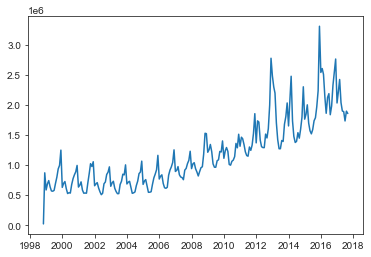

In [45]:
# Groupby time and sum of totals

gun_trend = gun_data.groupby(['month'])['totals'].sum()

MyPlot = plt.plot(gun_trend)

### Answer : It is increasing.

# ============================================================

### Research Question 2: What is the most purchased type of gun in 2017?

In [46]:
# Get the guns of 2017 from gun_data.

guns2017 = gun_data[gun_data['month'] == '2017-09']
guns2017 = guns2017.sort_values(by=['totals'], axis = 0, ascending = False).head(10)
guns2017.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
18,2017-09-01,Kentucky,378384.0,0.0,8112.0,7543.0,253.0,543,1.0,16.0,...,0.0,0.0,0.0,21.0,19.0,1.0,2.0,1.0,0.0,398706
46,2017-09-01,Texas,31390.0,0.0,39119.0,39416.0,2768.0,2473,0.0,59.0,...,0.0,0.0,0.0,121.0,87.0,13.0,2.0,5.0,0.0,128260
4,2017-09-01,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506
14,2017-09-01,Illinois,15712.0,71432.0,18290.0,10201.0,0.0,814,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,116449
9,2017-09-01,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721,1.0,18.0,...,0.0,0.0,0.0,11.0,9.0,0.0,0.0,1.0,0.0,77390


In [47]:
guns2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 18 to 25
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      10 non-null     datetime64[ns]
 1   state                      10 non-null     object        
 2   permit                     10 non-null     float64       
 3   permit_recheck             10 non-null     float64       
 4   handgun                    10 non-null     float64       
 5   long_gun                   10 non-null     float64       
 6   other                      10 non-null     float64       
 7   multiple                   10 non-null     int64         
 8   admin                      10 non-null     float64       
 9   prepawn_handgun            10 non-null     float64       
 10  prepawn_long_gun           10 non-null     float64       
 11  prepawn_other              10 non-null     float64       
 12  redemptio

In [48]:
# Find the highest total sales for each gun.

GunGroup = guns2017.sum()
GunGroup

state                        KentuckyTexasCaliforniaIllinoisFloridaPennsylv...
permit                                                                586767.0
permit_recheck                                                         71922.0
handgun                                                               242969.0
long_gun                                                              165665.0
other                                                                  12085.0
multiple                                                                  7447
admin                                                                    260.0
prepawn_handgun                                                          108.0
prepawn_long_gun                                                          93.0
prepawn_other                                                              5.0
redemption_handgun                                                     15581.0
redemption_long_gun                                 

### Answer:
### Most purchased gun is Handgun.

# ============================================================

### Research Question 3: What type of gun has highest quantity, and the relationship to totals?

In [49]:
# Get each gun with it's quantity and relationship to totals.

TypeGun = {}
AllStates = gun_data.columns[2:25]

for c in AllStates:
    TypeGun[c] = gun_data[c].sum()
    
max(TypeGun, key=TypeGun.get)

'long_gun'

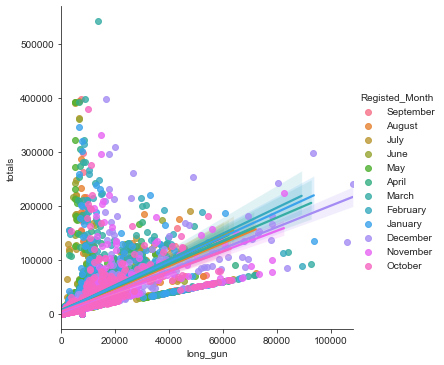

In [23]:
# Show plot.

MonthData = gun_data.month.dt.strftime("%B")
gun_data_Edit = gun_data.copy()
gun_data_Edit['Registed_Month']= MonthData
sns.lmplot(x = 'long_gun', y = 'totals', hue = 'Registed_Month', data = gun_data_Edit)

### Answer:
### Highest quantity gun is Long gun. It's relationship to totals is positive with almost 95% confident level.

# ============================================================

### Research Question 4: What is the ratio between buying and renting hand gun?

In [24]:
# Show in numbers the ratio between sales and rentals of handgun.

handgun = gun_data[['handgun', 'rentals_handgun','state']]
sumOfSales = handgun['handgun'].sum()

In [25]:
sumOfRentals = handgun['rentals_handgun'].sum()

In [26]:
# Converting from scientific notation to decimal point and displaying.

ratio = sumOfRentals / sumOfSales
output = f"{ratio:.9f}"
print(output)

0.000012922


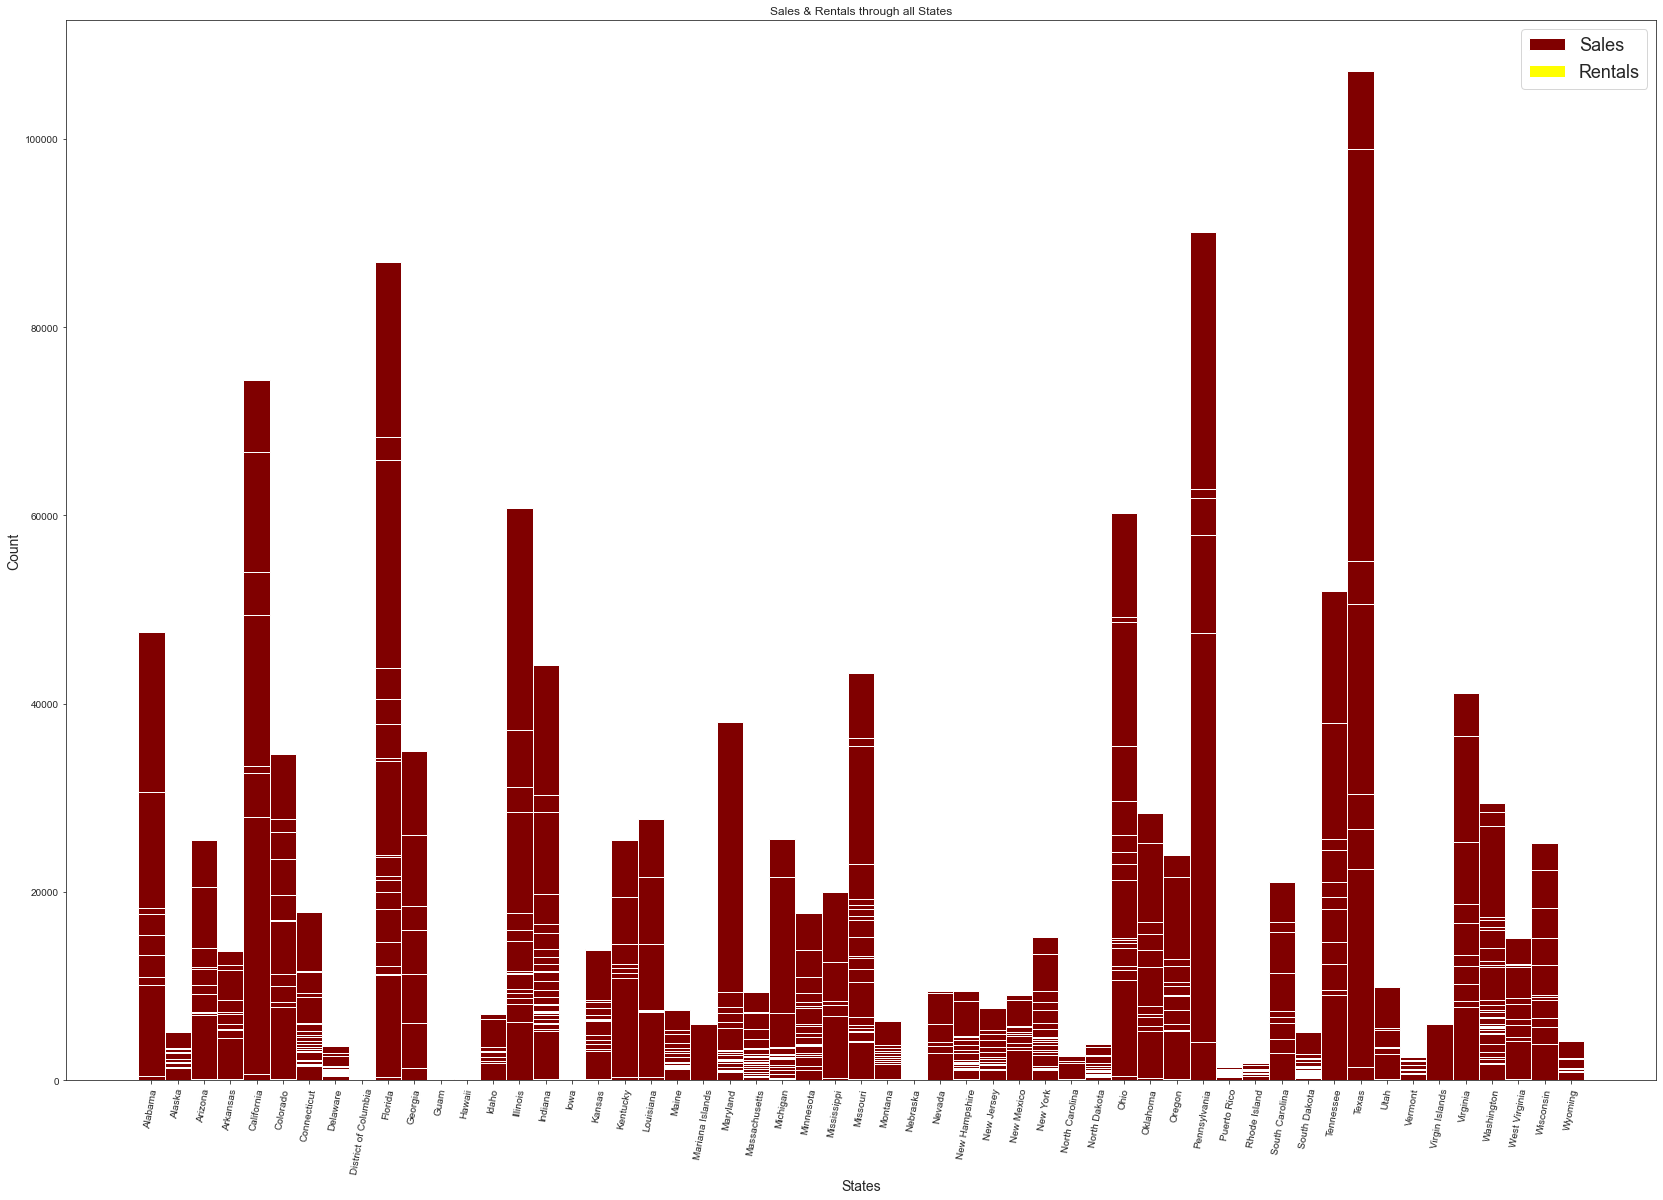

In [27]:
# Showing Sales compared to Rentals.

handgun = handgun.fillna(0)
plt.bar(handgun['state'], handgun['handgun'], color ='maroon', width = 1)
plt.bar(handgun['state'], handgun['rentals_handgun'], color ='yellow', width = 1)
plt.xlabel("States", size=14)
plt.ylabel("Count", size=14)
plt.title("Sales & Rentals through all States")
plt.legend(['Sales','Rentals'], loc='upper right', prop={'size': 18})
plt.xticks(rotation=80)
x = plt.gcf()
x.set_size_inches(28.5, 19.5)

### Answer:
### The highest ratio is 0.000012922, which means almost per 100,000 buyings there is 1.3 handgun rented.
### Also it is clear that the rentals is not comparable to the count of sales, which means as it is almost not there!

# ============================================================

In current study, a strong analysis has been performed on the data. Prior to each step, detailed documentation and comments was given and interpretions was also provided afterwards. The dataset included 2 tables, but they had to be handled differently. The data was ranging from 1998 to 2017, which consisted of detailed information of registered gun. Based on such substantial data, the analysis would be more accurate for being bigger.

Current study were narrow due to data being limited to "two" tables. On the other hand, the population estimation were only recorded for 2010 and 2016, which inhibits some analysis to a small range, same for many other parameters, such as "Foreign born persons, percent", "Veterans, 2011-2015", etc.

Hope the reader got valuable information from this small study and if errors that the writer, me, couldn't find and solve, we are all humans after all. This paper accepts modifications and/or additions and/or removals.